In [1]:
# read the csv files to get raw data

import pandas as pd
import numpy as np

def read_data(filename):
    
    '''
    Phyphox can output raw data as csv files. 
    For a gyroscope data, it has such format:
    time, gyroscope x, gyroscope y, gyroscope z, absolute value.
    '''

    try:
        file = pd.read_csv(filename)
        data = np.zeros((file.shape[1],file.shape[0]))
        
        data[0] = np.array(file['Time (s)'])
        data[1] = np.array(file['Gyroscope x (rad/s)'])
        data[2] = np.array(file['Gyroscope y (rad/s)'])
        data[3] = np.array(file['Gyroscope z (rad/s)'])
        data[4] = np.array(file['Absolute (rad/s)'])
        
        # return the data as a numpy array
        return(data)
    
    except:
        print("The file is not a csv file or it's not in the current folder.")


In [3]:
data=read_data('data\z_cir.csv')

In [4]:
time, xdata, ydata, zdata, absdata = data[0:5,630:1000]

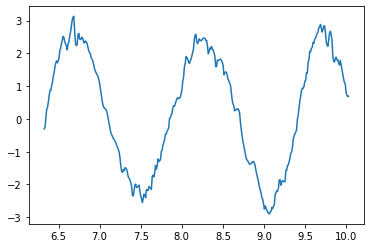

In [5]:
import matplotlib.pyplot as plt
plt.plot(time,xdata)
#time[900]

In [5]:
# compute parameters of the fitting equation and chi square

def fit1(time,y,n):
    
    '''
     fitting for circular motion with a constant acceleration
     time is the absolute time, y is the fitting data points, n is the order level
     data does not include uncertainty
    '''
    
    # define matrix A, Y
    n += 1
    Y = np.arange(n)
    A = np.zeros((time.shape[0],Y.shape[0]))
    
    # fill the matrix A
    for i in Y:
        A[:,i] = time ** i
        
    # construct left and right hand side of the equation
    left = A.T @ A
    right = A.T @ y
    
    # use numpy to compute parameter set a
    a = np.linalg.solve(left,right)
    
    return a

In [6]:
a=fit1(time,xdata,100)
xv=time
def yy(x,a):
    #m=x.shape[0]
    n=a.shape[0]
    yy = a[0]
    for i in np.arange(1,n):
        yy = yy + a[i]*(x**i)
    return yy
yv=yy(xv,a)        
#yv = a[0]+a[1]*time**1+a[2]*time**2+a[3]*time**3+a[4]*time**4+a[5]*time**5

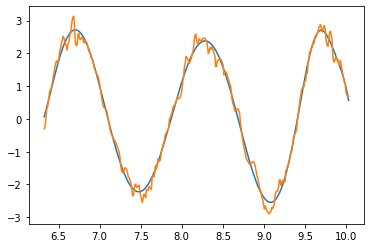

In [7]:
plt.plot(xv,yv)
plt.plot(time,xdata)

In [8]:
def chi2 (data,fit,m):
    '''
    Input: data is the actual data points and fit is the fitting points;
    and m here means the number of constraints.
    Since the uncertainty of data is always considered as 1 so chi2 is the mean-squared distance.
    '''
    
    # calculate chi square
    chi2 = np.sum((data-fit)**2)
    
    # calculate variance
    dof = data.shape[0]
    var = chi2 / (dof - m)
    
    return chi2, var

[   2.45830085    4.09368035 -142.61407767  564.1552435 ]
2.4583008465373464 4.093680351684828 0.1269727687271771 4.951751156069385


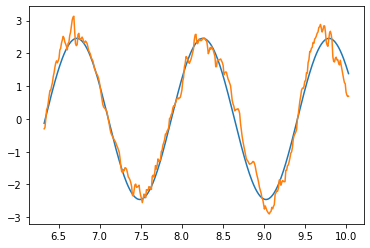

In [63]:
from scipy.optimize import leastsq
def residuals(para,y,x):
    w1,w2,phi,theta = para
    res = y - w1 * np.sin(w2*(x+phi) + theta)
    return res
para = [2.5,np.pi*2/1.6,-0.3,np.pi/2]
p = leastsq(residuals,para,args=(xdata,time))
w1,w2,phi,theta=p[0]
if theta > np.pi * 2 or theta < 0:
    theta = theta % (2*np.pi)
if phi > (np.pi * 2 / w2) or phi < 0:
    phi = phi % (np.pi * 2 / w2)
yfit = w1 * np.sin(w2*(time+phi) + theta)
plt.plot(time,yfit)
plt.plot(time,xdata)
print(p[0])
print(w1,w2,phi,theta)

In [296]:
import numpy as np
from scipy.optimize import leastsq
import pylab as pl
 
#定义函数形式和误差
def func(x,p):
    A,k,theta=p
    return A*np.sin(2*np.pi*k*x+theta)
def residuals(p,y,x):
    return y-func(x,p)
#生成训练数据
x=np.linspace(0,-2*np.pi,100)
A,k,theta=10,0.34,np.pi/6
y0=func(x,[A,k,theta])
y1=y0+2*np.random.randn(len(x))
#trian the para
p0=[7,0.2,0]#在非线性拟合中，初始参数对结果的好坏有很大的影响
Para=leastsq(residuals,p0,args=(y1,x))
a1,a2,a3=Para[0]
#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x,y1,color="red",label="Sample Point",linewidth=3) #画样本点
y=a1*np.sin(2*np.pi*a2*x+a3)
plt.plot(x,y,color="orange",label="Fitting Line",linewidth=2) #画拟合直线
plt.legend()
plt.show()

TypeError: residuals() missing 2 required positional arguments: 'y' and 'x'

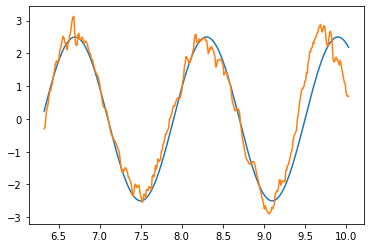

In [59]:
para = [2.5,1.6,np.pi/2]
yfit = 2.5 * np.sin(np.pi*2/1.6*(time-0.3)+np.pi/2 )
plt.plot(time,yfit)
plt.plot(time,xdata)